In [1]:
from project_fraud.lib import drop_many_missing_values
from project_fraud.feature_engineering import clean_mail, make_day_feature, make_hour_feature, string_card, credit_cards, dist_from_mean, dist_from_median_rel


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression

In [2]:
def transform_raw_data():
    data = drop_many_missing_values()
    data['P_emaildomain_bin'], data['P_emaildomain_suffix'] = clean_mail(data)
    data['weekday'] = make_day_feature(data, offset=0.58)
    data['hours'] = make_hour_feature(data)
    data['cardID'] = data.apply(lambda row: string_card(row), axis=1)
    data = data.merge(credit_cards(data), how='left', on="cardID")
    data['dist_mean'] = data.apply(lambda row: dist_from_mean(row, 'mean'), axis=1)
    data['dist_median'] = data.apply(lambda row: dist_from_mean(row, 'median'), axis=1)
    data['dist_mean_rel'] = data.apply(lambda row: dist_from_median_rel(row, 'mean'), axis=1)
    data['dist_median_rel'] = data.apply(lambda row: dist_from_median_rel(row, 'median'), axis=1)
    return data

In [4]:
data_transformed = transform_raw_data()

In [5]:
def clean_mail_suffix(P_emaildomain_suffix):
    if P_emaildomain_suffix == 'nan':
        return np.nan
    else:
        return P_emaildomain_suffix

In [6]:
data_transformed['P_emaildomain_suffix'] = data_transformed['P_emaildomain_suffix'].apply(lambda x: clean_mail_suffix(x))

In [7]:

X = data_transformed[['TransactionID','P_emaildomain_suffix','P_emaildomain_bin',
'card1','card2','addr1','TransactionAmt','card5','D15','C13','D2','D10','D4','weekday','hours',\
           'dist_mean', 'dist_median','dist_mean_rel','dist_median_rel']]
y = data_transformed['isFraud']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.00017, random_state=1)

In [9]:
sample_size = 15000
X_small = X_train.sample(sample_size, random_state=0)
y_small = y_train.sample(sample_size, random_state=0)

In [10]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, random_state=0)

In [ ]:
# calculate the probability of transaction being fraudulent: 


Text(0, 0.5, 'Fraction of fraudulent transactions')

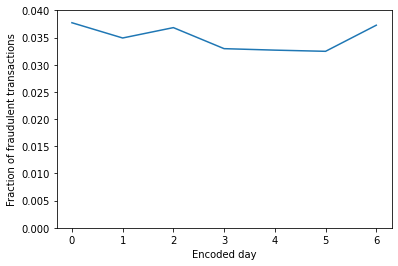

In [15]:
# visualize fraction of fraudulent transactions per weekday 

plt.plot(data_transformed.groupby('weekday').mean()['isFraud'])

plt.ylim(0, 0.04)
plt.xlabel('Encoded day')
plt.ylabel('Fraction of fraudulent transactions')

Text(0, 0.5, 'Number of transactions')

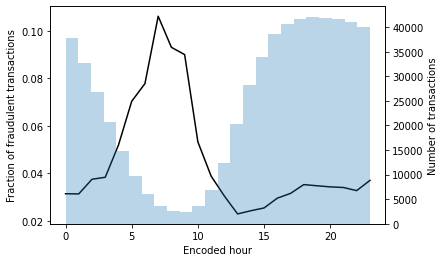

In [17]:
# plot number of transactions versus fraction of fraudulent transactions 

plt.plot(data_transformed.groupby('hours').mean()['isFraud'], color='k')

ax = plt.gca()
ax2 = ax.twinx()
_ = ax2.hist(data_transformed['hours'], alpha=0.3, bins=24)
ax.set_xlabel('Encoded hour')
ax.set_ylabel('Fraction of fraudulent transactions')

ax2.set_ylabel('Number of transactions')

In [ ]:
# dist_median_rel

plt.plot(data_transformed.groupby('hours').mean()['isFraud'], color='k')

ax = plt.gca()
ax2 = ax.twinx()
_ = ax2.hist(data_transformed['hours'], alpha=0.3, bins=24)
ax.set_xlabel('Encoded hour')
ax.set_ylabel('Fraction of fraudulent transactions')

ax2.set_ylabel('Number of transactions')

In [ ]:
plt.figure(figsize=(10,5))
plt.xlim(0,2000)
plt.xlabel('Price')
plt.ylabel('Records')
sns.distplot(X_small['dist_median'],bins=100,kde=False)
plt.show()